## 6.2 Exploring Relationships

1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline

In [4]:
# Folder path 
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [5]:
# Import data
df = pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean1.csv'), index_col = False)

2. Data Clean

In [6]:
df.shape

(239677, 21)

In [7]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'number_killed',
       'number_injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Reated?', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude'],
      dtype='object')

In [8]:
df.dtypes

incident_id                   int64
date                         object
state                        object
city_or_county               object
number_killed                 int64
number_injured                int64
congressional_district      float64
gun_type                     object
incident_characteristics     object
Gang Reated?                 object
Mass shooting?               object
number_guns_involved         object
participant_age              object
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
state_house_district         object
state_senate_district        object
latitude                    float64
longitude                   float64
dtype: object

In [9]:
df.head()

,incident_id,date,state,city_or_county,number_killed,number_injured,congressional_district,gun_type,incident_characteristics,Gang Reated?,...,number_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude
0,461105,1/1/13,Pennsylvania,Mckeesport,0,4,14.0,0::Unkown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Not Gang Related,...,Unkown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unkown,Unkown,40.3467,-79.8559
1,460726,1/1/13,California,Hawthorne,1,3,43.0,0::Unkown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Gang Related,...,Unkown,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62,35,33.9090,-118.3330
2,478855,1/1/13,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377
3,478925,1/5/13,Colorado,Aurora,4,0,6.0,0::Unkown,"Shot - Dead (murder, accidental, suicide)||Off...",Not Gang Related,...,Unkown,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40,28,39.6518,-104.8020
4,478959,1/7/13,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569


In [10]:
df.isnull().sum()

incident_id                     0
date                            0
state                           0
city_or_county                  0
number_killed                   0
number_injured                  0
congressional_district      11944
gun_type                        0
incident_characteristics      326
Gang Reated?                    0
Mass shooting?                  0
number_guns_involved            0
participant_age                 0
participant_age_group           0
participant_gender              0
participant_status              0
participant_type                0
state_house_district            0
state_senate_district           0
latitude                     7923
longitude                    7923
dtype: int64

In [11]:
# find duplicates
df_dups = df[df.duplicated()]

In [12]:
df_dups.shape

(0, 21)

In [14]:
#create some additional columns
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['loss'] = df['number_killed'] + df['number_injured']

In [15]:
print("Gun Violence Dimensions:", df.shape)
df.head()

Gun Violence Dimensions: (239677, 24)


,incident_id,date,state,city_or_county,number_killed,number_injured,congressional_district,gun_type,incident_characteristics,Gang Reated?,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,0::Unkown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Not Gang Related,...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unkown,Unkown,40.3467,-79.8559,2013,1,4
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,0::Unkown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Gang Related,...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62,35,33.9090,-118.3330,2013,1,4
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377,2013,1,4
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,0::Unkown,"Shot - Dead (murder, accidental, suicide)||Off...",Not Gang Related,...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40,28,39.6518,-104.8020,2013,1,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569,2013,1,4


In [16]:
df.tail(4)

,incident_id,date,state,city_or_county,number_killed,number_injured,congressional_district,gun_type,incident_characteristics,Gang Reated?,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,4.0,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Ins...",Not Gang Related,...,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,23,31,31.7537,-93.0836,2018,3,1
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,2.0,0::Unknown,Shot - Wounded/Injured,Not Gang Related,...,0::Male,0::Injured,0::Victim,85,7,29.9239,-90.0442,2018,3,1
239675,1082514,2018-03-31,Texas,Houston,1,0,9.0,0::Unknown,"Shot - Dead (murder, accidental, suicide)",Not Gang Related,...,0::Male,0::Killed,0::Victim,149,17,29.7201,-95.6110,2018,3,1
239676,1081940,2018-03-31,Maine,Norridgewock,2,0,2.0,0::Handgun||1::Shotgun,"Shot - Dead (murder, accidental, suicide)||Sui...",Not Gang Related,...,0::Female||1::Male,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,111,3,44.7293,-69.7691,2018,3,2


In [17]:
df['year'].describe()

count    239677.000000
mean       2015.711629
std           1.225870
min        2013.000000
25%        2015.000000
50%        2016.000000
75%        2017.000000
max        2018.000000
Name: year, dtype: float64

In [22]:
df = df.rename(columns={'Gang Reated?':'Gang Related','Mass Shooting?':'Mass Shooting',
                       'number_killed':'Killed','number_injured':'Injured'})

In [23]:
df.head()

,incident_id,date,state,city_or_county,Killed,Injured,congressional_district,gun_type,incident_characteristics,Gang Related,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,0::Unkown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,Not Gang Related,...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unkown,Unkown,40.3467,-79.8559,2013,1,4
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,0::Unkown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Gang Related,...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62,35,33.9090,-118.3330,2013,1,4
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377,2013,1,4
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,0::Unkown,"Shot - Dead (murder, accidental, suicide)||Off...",Not Gang Related,...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40,28,39.6518,-104.8020,2013,1,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Not Gang Related,...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569,2013,1,4


In [24]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'Killed', 'Injured',
       'congressional_district', 'gun_type', 'incident_characteristics',
       'Gang Related', 'Mass shooting?', 'number_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'latitude', 'longitude', 'year', 'month',
       'loss'],
      dtype='object')

In [27]:
df_sub = df[['year','month','loss','Gang Related','Mass shooting?','state']]

In [28]:
df_sub.corr()

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_29226/2510699769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,year,month,loss
year,1.000000,-0.166297,0.007055
month,-0.166297,1.000000,0.016942
loss,0.007055,0.016942,1.000000


/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_29226/2209928231.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_sub.corr())


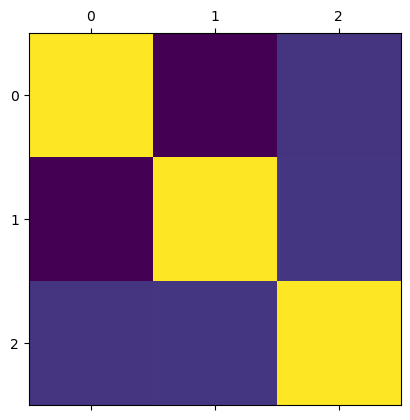

In [29]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

In [31]:
# Create a sub data frame with just numbers

df_sub2 =df[['year','month','loss','longitude','latitude','congressional_district','state_senate_district','state_house_district','number_guns_involved']]

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_29226/3778109289.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_sub2.corr())


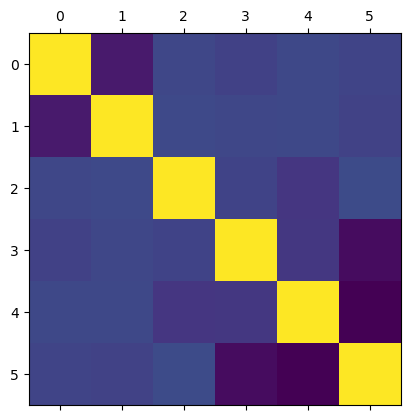

In [32]:
# Create a correlation heatmap using matplotlib with sub2

plt.matshow(df_sub2.corr())
plt.show()

/var/folders/xd/drqthjd9059gd5kl114ffjhr0000gn/T/ipykernel_29226/4223995642.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_sub2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


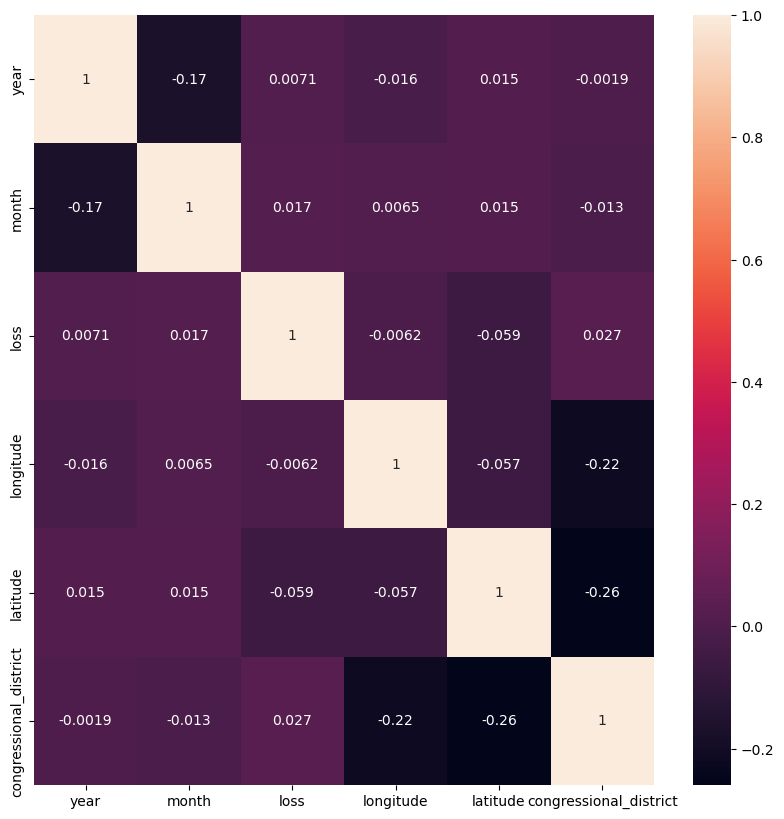

In [33]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

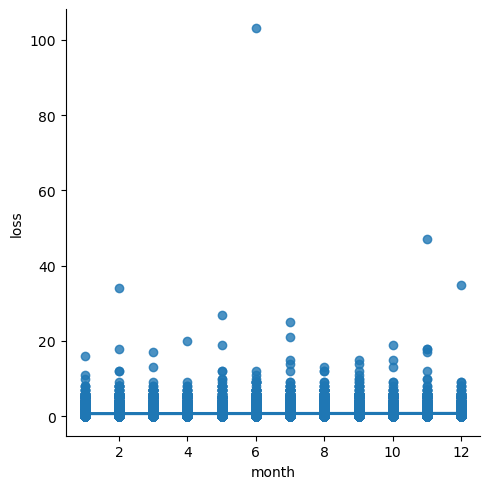

In [34]:
# Create a scatterplot for the "month" and "loss" columns in seaborn

sns.lmplot(x = 'month', y = 'loss', data = df_sub2)

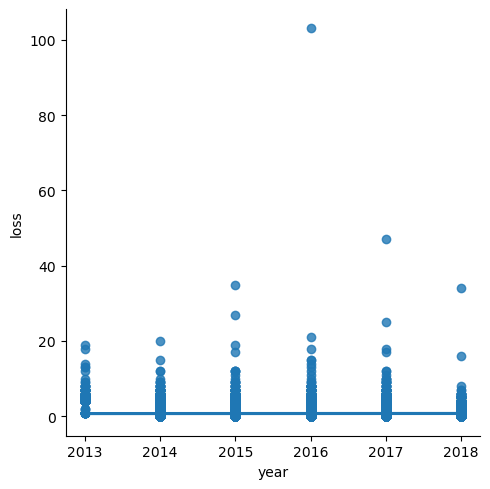

In [36]:
# Create a scatterplot for the "month" and "loss" columns in seaborn

sns.lmplot(x = 'year', y = 'loss', data = df_sub2)

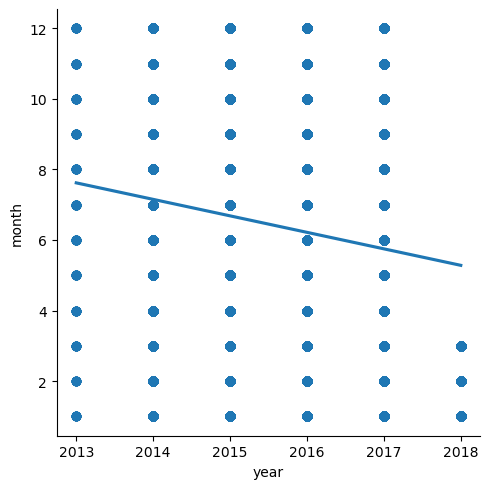

In [37]:
# Create a scatterplot for the "month" and "loss" columns in seaborn

sns.lmplot(x = 'year', y = 'month', data = df_sub2)

In [38]:
# Export
df.to_csv(os.path.join(path, 'Data', 'gun-violence-data-clean2.csv'))